## Netflix - Exploratory Data Analysis

#### This dataset is taken from Kaggle. It contains information of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials.

In [1]:
# import numpy
import numpy as np


# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

In [2]:
plt.rcParams["figure.figsize"] = [15,8]

In [3]:
df_netflix = pd.read_csv('NetflixOriginals.csv', encoding = "ISO-8859-1")
df_netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


### Data Definition

1. Title - Title of the Netflix Original
2. Genre - Genre of the Netflix Original
3. Premiere - The date and year of when the Netflix Original was first premiered
4. IMBD Score - It is the average rating of the movie given by the peoples. It represents how much people likes or dislikes the movie
5. Language - Language of the movie or documentary os special

### Analyizing the data

In [4]:
df_netflix.shape

(584, 6)

#### There are 584 records and 6 features.

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


#### Here we can see that 'Title', 'Genre', 'Premiere' and 'Language' are all of 'object' type since they contain strings. 
#### 'Runtime' will contains whole numbers so it is of 'int' type and 'IMDB Score' contains any value from 0-10 including decimals so it is of 'float' type.

In [6]:
df_netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


#### From the above, we can see that the average runtime for all the movies is around 93.57 minutes. The shortest duration is 4 minutes and the longest is 209 minutes. Half of the movies have durations lesser than 97 minutes.
#### The average IMDB Score is 6.271747 while the lowest and highest are 2.500000 and 9.000000, respectively.

In [7]:
df_netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [8]:
df_netflix['Genre'].nunique()

115

#### There are 115 different genres of movies in this dataset.

In [9]:
df_netflix['Genre'].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama              

#### From the above, we can see that the top five are genres are (in order of most popular to least) :
1. Documentary
2. Drama
3. Comedy
4. Romantic Comedy
5. Thriller

In [10]:
df_netflix['Language'].nunique()

38

#### There are 38 different languages among the Netflix Original Content.

In [11]:
df_netflix['Language'].value_counts()

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

#### The top three languages are:
1. English
2. Hindi
3. Spanish

In [12]:
df_netflix.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

#### There are no missing values or null values in the data.

In [13]:
df_netflix[df_netflix.duplicated()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language


#### There are no duplicates in the data.

In [14]:
df_netflix['Premiere'][111] = 'October 16, 2019'
df_netflix['Premiere'][308] = 'September 15, 2017'
df_netflix['Premiere'][387] = 'July 15, 2016'
df_netflix['Premiere'][538] = 'October 27, 2017'
df_netflix['Premiere'][541] = 'September 16, 2016'

In [15]:
df_netflix['Premiere'] = pd.to_datetime(df_netflix['Premiere'])

In [16]:
df_cat = df_netflix.select_dtypes(include='object')
df_cat.columns

Index(['Title', 'Genre', 'Language'], dtype='object')

In [17]:
df_num = df_netflix.select_dtypes(include=[np.number])
df_num.columns

Index(['Runtime', 'IMDB Score'], dtype='object')

In [18]:
df_premiere = df_netflix['Premiere']

For now, let's drop the 'Title' columns since it does not contribute much to the analysis.

In [19]:
df_cat_1 = df_cat.drop('Title',axis=1)
df_cat_1.columns

Index(['Genre', 'Language'], dtype='object')

In [20]:
for i in df_cat_1.columns:
    print("Column name: ", i)
    print(df_cat_1[i].value_counts(), '\n')
    print('-'*20)

Column name:  Genre
Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports

In [21]:
df_num.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


In [22]:
df_cat_1.columns

Index(['Genre', 'Language'], dtype='object')

In [23]:
df_num.columns

Index(['Runtime', 'IMDB Score'], dtype='object')

### EDA - Exploratory Data Analysis

## Basic Statistics:

### 1. What is the average runtime of the movies in the dataset?

In [24]:
df_num['Runtime'].mean()

93.57705479452055

### 2. What is the distribution of IMDB scores?

In [25]:
df_num['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

<Axes: xlabel='IMDB Score', ylabel='Count'>

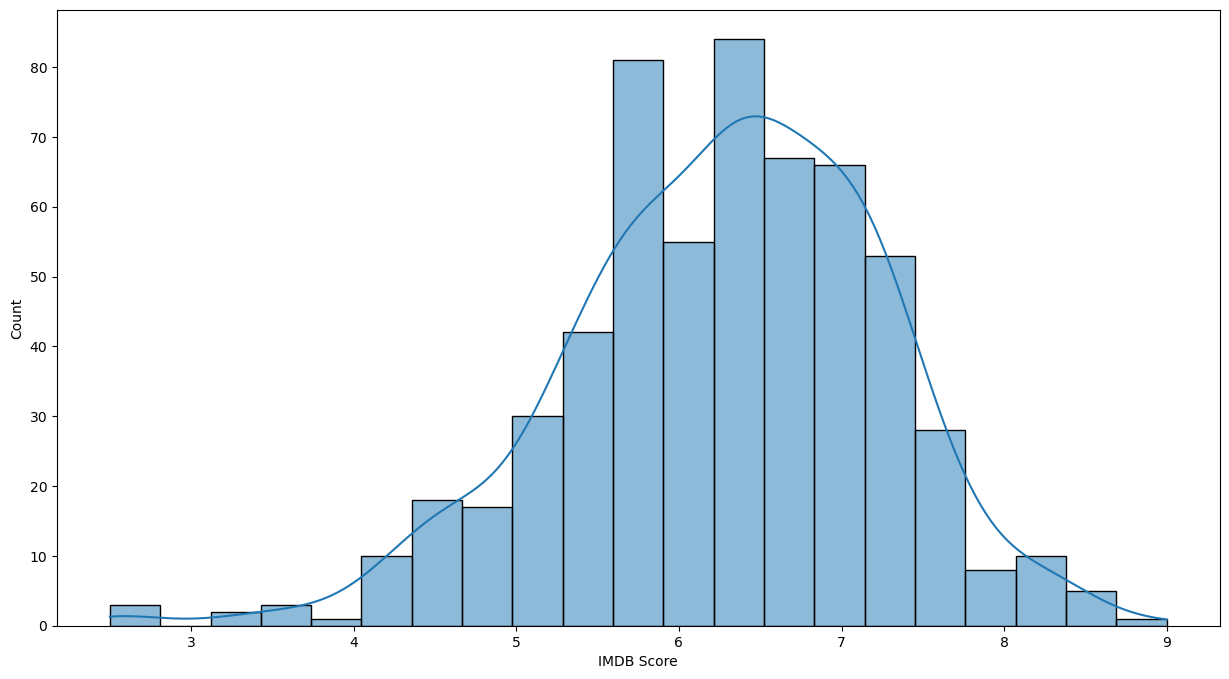

In [26]:
sns.histplot(df_num['IMDB Score'], kde=True)

Most of the IMDB scores are around 6-7 and follow a bell-shaped (Gaussian) distribution.

### 3. How many movies are there in each genre?

In [27]:
df_cat_1['Genre'].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama              

## Genre and Runtime Analysis:

### 1. What is the genre with the highest average runtime?

In [28]:
avg_runtime_bygenre = df_netflix.groupby(by='Genre')['Runtime'].mean()
avg_runtime_bygenre.sort_values(ascending=False)

Genre
Heist film/Thriller                     149.000000
Anthology/Dark comedy                   149.000000
Zombie/Heist                            148.000000
War drama                               145.500000
Horror anthology                        144.000000
Psychological thriller drama            142.000000
Historical drama                        140.000000
Science fiction/Mystery                 126.000000
Superhero/Action                        124.000000
Psychological thriller                  124.000000
Romantic thriller                       123.000000
Spy thriller                            122.000000
War-Comedy                              122.000000
Action-adventure                        121.000000
Historical-epic                         121.000000
Action-thriller                         119.666667
Family/Christmas musical                119.000000
Crime drama                             118.181818
Musical comedy                          117.500000
Urban fantasy            

The highest average runtime is for the genre 'Heist film/Thriller' with the runtime as 149 minutes.

### 2. Are there any genres that have significantly shorter or longer runtimes compared to others?

Since there are 115 genres, we shall focus on the 10 genres with most movies.

In [29]:
genre_counts = df_netflix['Genre'].value_counts()
top_genres = genre_counts.nlargest(10).index
df_top_genres = df_netflix[df_netflix['Genre'].isin(top_genres)]
df_top_genres

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
5,Drive,Action,2019-11-01,147,3.5,Hindi
6,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish
9,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
11,The Call,Drama,2020-11-27,112,4.1,Korean
12,Whipped,Romantic comedy,2020-09-18,97,4.1,Indonesian
14,Mercy,Thriller,2016-11-22,90,4.2,English
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish


Text(0.5, 1.0, 'Runtime Distribution by Genre (Top 10 Genres)')

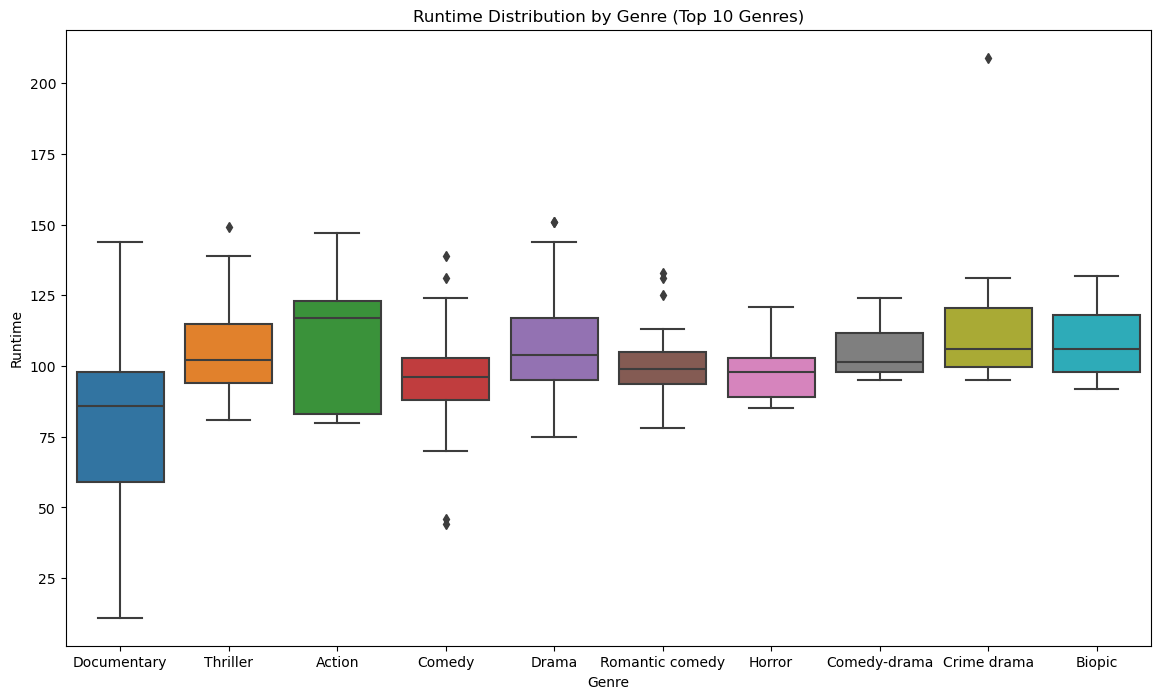

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Runtime', data=df_top_genres)
plt.title('Runtime Distribution by Genre (Top 10 Genres)')

## IMDB Score Analysis:

### 1. What is the highest and lowest IMDB score in the dataset?

In [31]:
df_netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [32]:
df_netflix['IMDB Score'].min()

2.5

In [33]:
df_netflix['IMDB Score'].max()

9.0

The minimum score is 2.5 and maximum score is 9.0.

### 2. Which movie(s) have the highest IMDB score? Which have the lowest?

In [36]:
max_imdb_score = df_netflix['IMDB Score'].max()

In [37]:
df_netflix[df_netflix['IMDB Score'] == max_imdb_score]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


In [38]:
min_imdb_score = df_netflix['IMDB Score'].min()

In [39]:
df_netflix[df_netflix['IMDB Score'] == min_imdb_score]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese


Here, we can see that the highest IMDB Score is 9.0 for the Documentary "David Attenborough: A Life on Our Planet".
The documentary "Enter the Anime" has the lowest IMDB Score of 2.5.

### 3. Is there a correlation between runtime and IMDB score?

In [40]:
df_netflix['Runtime'].dtype

dtype('int64')

In [41]:
df_netflix['IMDB Score'].dtype

dtype('float64')

In [47]:
df_num.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


Here, IMDB Score and Runtime have a negative correlation constant of -0.040896 which is not high so we can safely say that Runtime and IMDB Score do not have any correlation.

## Language Distribution:

### 1. How many movies are there in each language?


In [48]:
df_netflix['Language'].value_counts()

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

### 2. Are there any patterns in IMDB scores based on the language of the movies?

In [50]:
df_netflix['IMDB Score'].mean()

6.2717465753424655

In [52]:
df_netflix['Language'].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

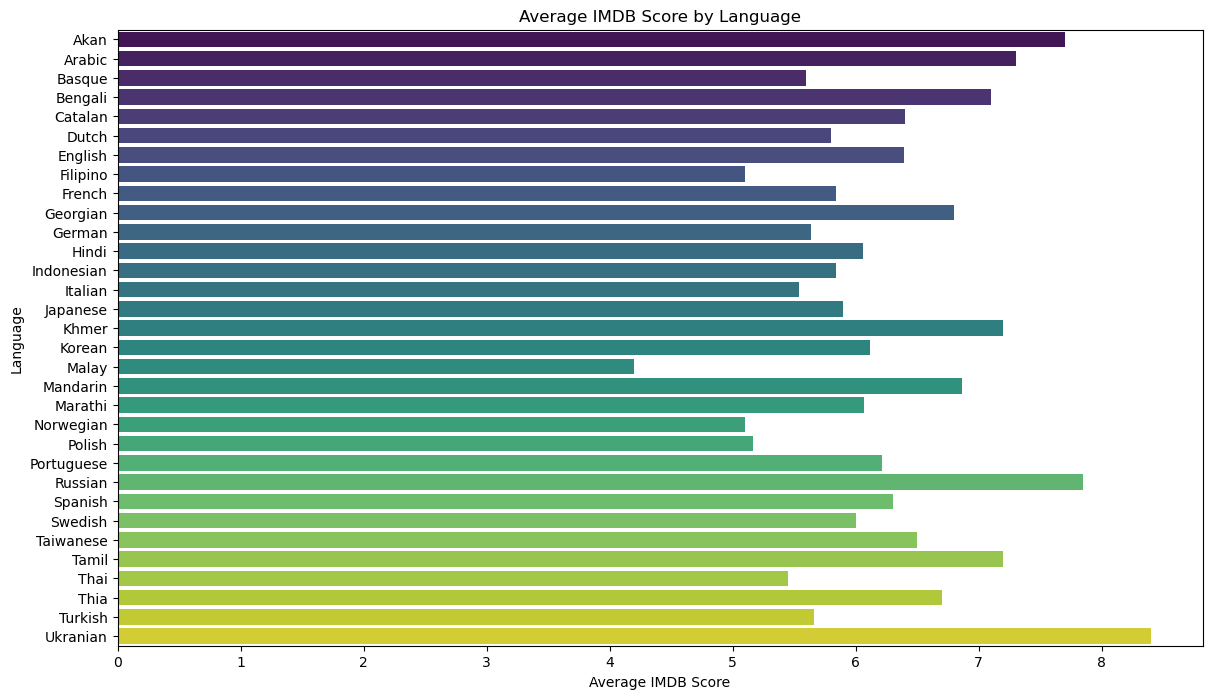

In [63]:
language_data = []

for index, row in df_netflix.iterrows():
    languages = row['Language'].split('/')
    for language in languages:
        language_data.append({
            'Title': row['Title'],
            'Genre': row['Genre'],
            'Premiere': row['Premiere'],
            'Runtime': row['Runtime'],
            'IMDB Score': row['IMDB Score'],
            'Language': language.strip()
        })

df_languages = pd.DataFrame(language_data)

average_imdb_by_language = df_languages.groupby('Language')['IMDB Score'].mean().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(x='IMDB Score', y='Language', data=average_imdb_by_language, palette='viridis')
plt.title('Average IMDB Score by Language')
plt.xlabel('Average IMDB Score')
plt.ylabel('Language')
plt.show()

## Premiere Date Analysis

### 1.  How many movies were released each year?


In [67]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [69]:
df_netflix['Premiere'].dt.year.value_counts()

Premiere
2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: count, dtype: int64

### 2. Is there any trend in IMDB scores over the years?

In [84]:
df_netflix['Year'] = df_netflix['Premiere'].dt.year

In [87]:
avg_imdb = df_netflix.groupby('Year')['IMDB Score'].mean().reset_index()

<Axes: xlabel='Year', ylabel='IMDB Score'>

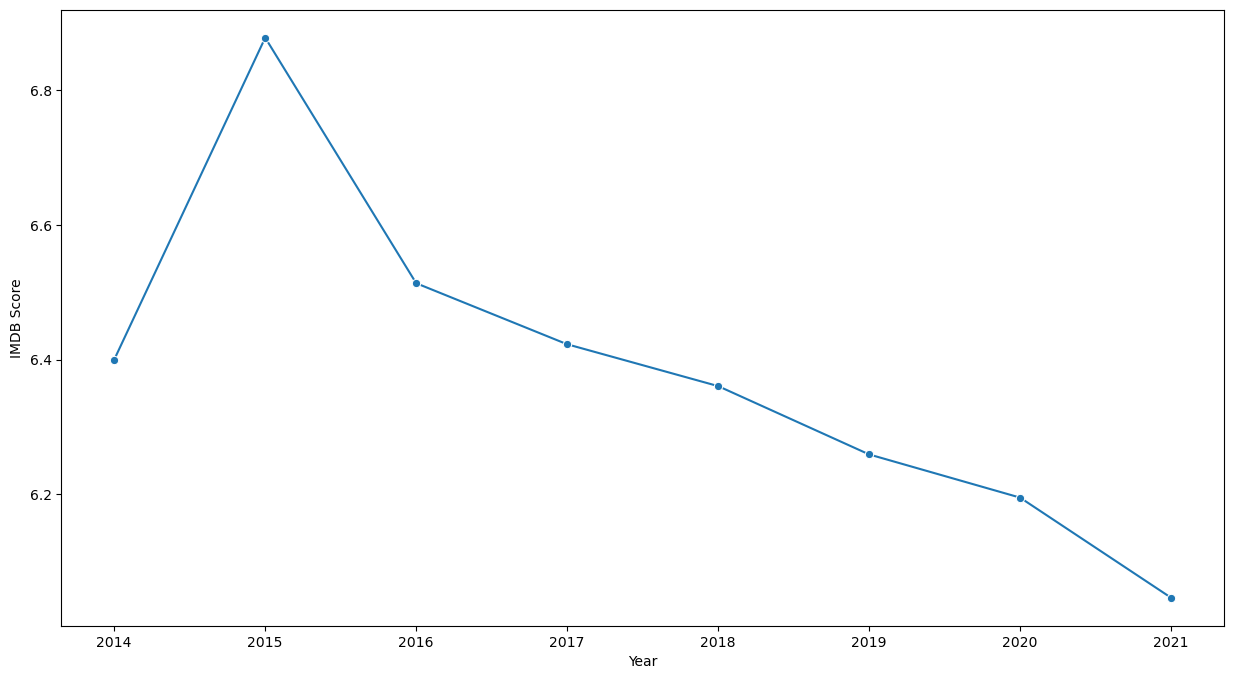

In [88]:
sns.lineplot(x='Year', y='IMDB Score', data=avg_imdb, marker='o')

We can see a decreasing trend in IMDB Scores after a peak in the year 2015.

### 3. Are certain genres more popular in specific years?

In [90]:
df_netflix['Genre'].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama              

In [103]:
genre_by_year = df_netflix.groupby(by=['Year', 'Genre']).size().reset_index(name='Count')

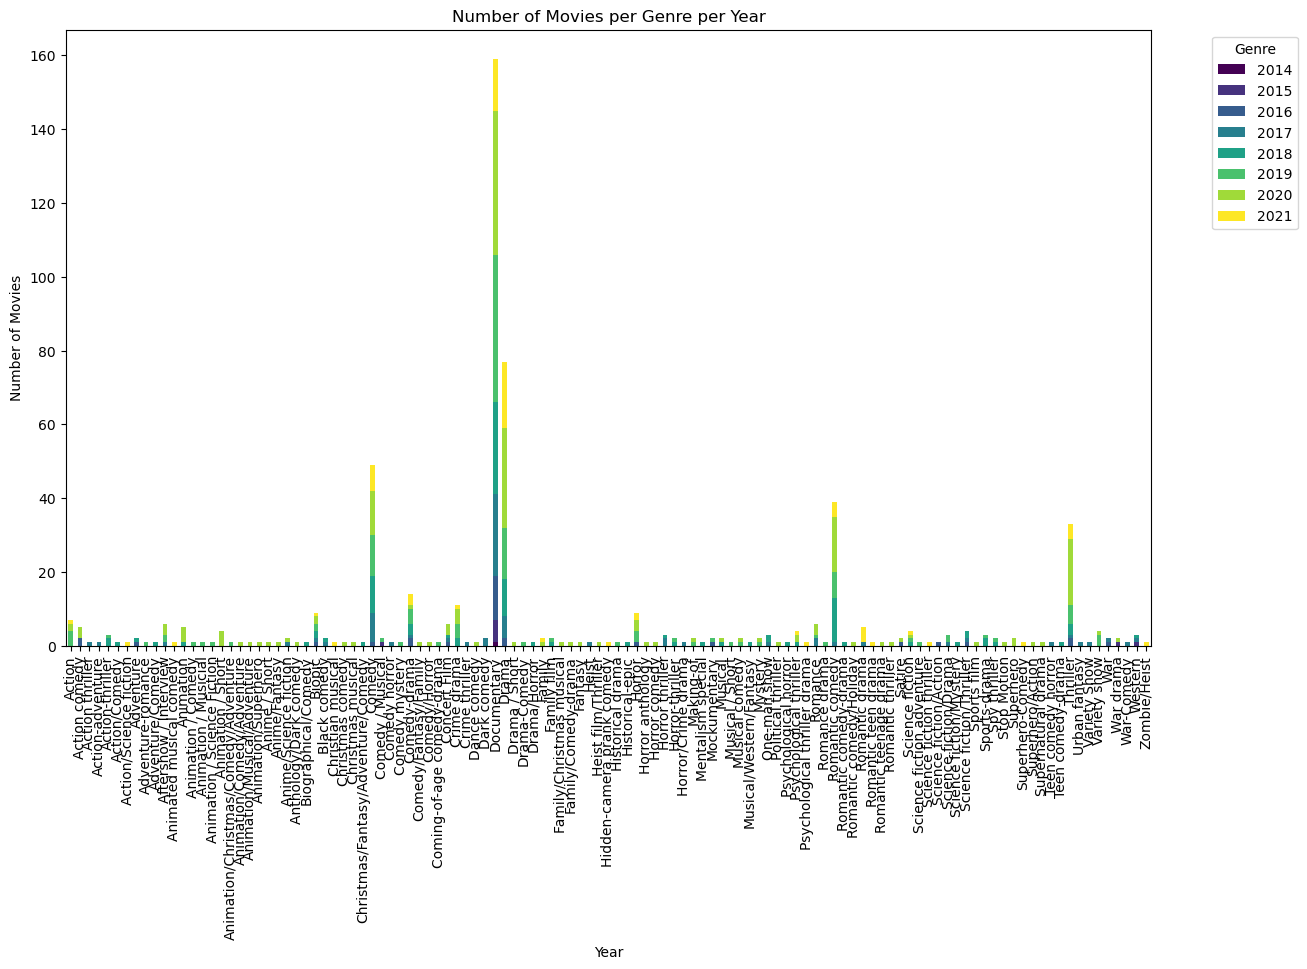

In [107]:
genre_pivot = genre_by_year.pivot(index='Genre', columns='Year', values='Count').fillna(0)

genre_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Number of Movies per Genre per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

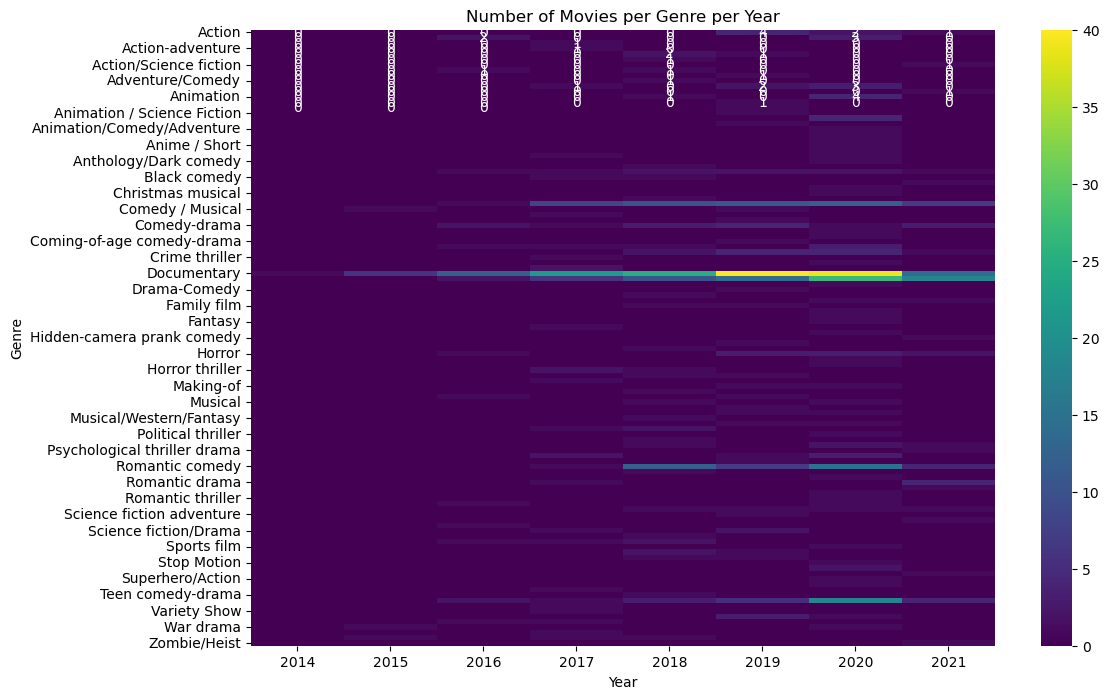

In [110]:
genre_pivot = genre_by_year.pivot(index='Genre', columns='Year', values='Count').fillna(0)

# Step 4: Visualize the data
plt.figure(figsize=(12, 8))
sns.heatmap(genre_pivot, cmap='viridis', annot=True, fmt='g')
plt.title('Number of Movies per Genre per Year')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()

## Cross-Category Analysis:

### 1. Which genre has the highest average IMDB score?

In [115]:
scores_genre = df_netflix.groupby(by='Genre')['IMDB Score'].mean()

In [118]:
scores_genre.sort_values(ascending=False)

Genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Making-of                               7.450000
Action-adventure                        7.300000
Historical drama                        7.200000
Coming-of-age comedy-drama              7.200000
Drama-Comedy                            7.200000
One-man show                            7.133333
Animation / Short                       7.125000
Mentalism special                       7.100000
War drama                               7.100000
Animation / Comedy                      7.000000
Christmas/Fantasy/Adventure/Comedy      7.000000
Documentary                             6.936478
Historical-epic                         6.900000
Biographical/Comedy                     6.800000
Aftershow / Interview                   6.750000
War           

Here, we can see that the highest average IMDB Score is for the genre 'Animation/Christmas/Comedy/Adventure'.

### 2. Is there a relationship between the language of the movie and its IMDB score?

In [123]:
df_netflix['Language'].value_counts()

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

In the above, we can see that the languages are not unique. As in, Instead of 'English', we also have 'English/Spanish', or 'English/Hindi', etc.

So, we first have to get all the unique languages in the dataset.

In [127]:
language_data = []

for index, row in df_netflix.iterrows():
    languages = row['Language'].split('/')
    for language in languages:
        language_data.append({
            'Title': row['Title'],
            'Genre': row['Genre'],
            'Premiere': row['Premiere'],
            'Runtime': row['Runtime'],
            'IMDB Score': row['IMDB Score'],
            'Language': language.strip()
        })

df_languages = pd.DataFrame(language_data)
df_languages['Language'].value_counts()

Language
English       422
Spanish        39
Hindi          35
French         21
Italian        14
Portuguese     12
Indonesian      9
Japanese        8
Korean          7
German          5
Turkish         5
Mandarin        3
Polish          3
Marathi         3
Dutch           3
Filipino        2
Thai            2
Swedish         2
Russian         2
Bengali         1
Akan            1
Arabic          1
Tamil           1
Khmer           1
Thia            1
Georgian        1
Norwegian       1
Malay           1
Taiwanese       1
Catalan         1
Basque          1
Ukranian        1
Name: count, dtype: int64

Now, that we have the unique languages in the data, we can go ahead and for any relationships between Language and IMDB Score.

In [129]:
df_languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       610 non-null    object        
 1   Genre       610 non-null    object        
 2   Premiere    610 non-null    datetime64[ns]
 3   Runtime     610 non-null    int64         
 4   IMDB Score  610 non-null    float64       
 5   Language    610 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.7+ KB


In [130]:
df_languages['Language'].astype('str')

0         English
1        Japanese
2         Spanish
3         Italian
4         English
5           Hindi
6           Hindi
7         Turkish
8         English
9         English
10          Hindi
11        English
12         Korean
13     Indonesian
14          Malay
15        English
16        Spanish
17          Hindi
18        English
19         Korean
20        English
21        English
22        English
23        English
24          Hindi
25        English
26        English
27          Dutch
28        English
29         French
30        Italian
31        English
32        Spanish
33        English
34         French
35     Portuguese
36        English
37        Italian
38         French
39       Filipino
40        English
41         French
42        English
43        Italian
44        English
45         German
46        English
47          Hindi
48         Polish
49        English
50        English
51        English
52         French
53        English
54        English
55        

In [131]:
df_languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       610 non-null    object        
 1   Genre       610 non-null    object        
 2   Premiere    610 non-null    datetime64[ns]
 3   Runtime     610 non-null    int64         
 4   IMDB Score  610 non-null    float64       
 5   Language    610 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.7+ KB


In [135]:
avg_imdb_by_lang = df_languages.groupby(by='Language')['IMDB Score'].mean().reset_index()

In [137]:
avg_imdb_by_lang.columns

Index(['Language', 'IMDB Score'], dtype='object')

<Axes: xlabel='IMDB Score', ylabel='Language'>

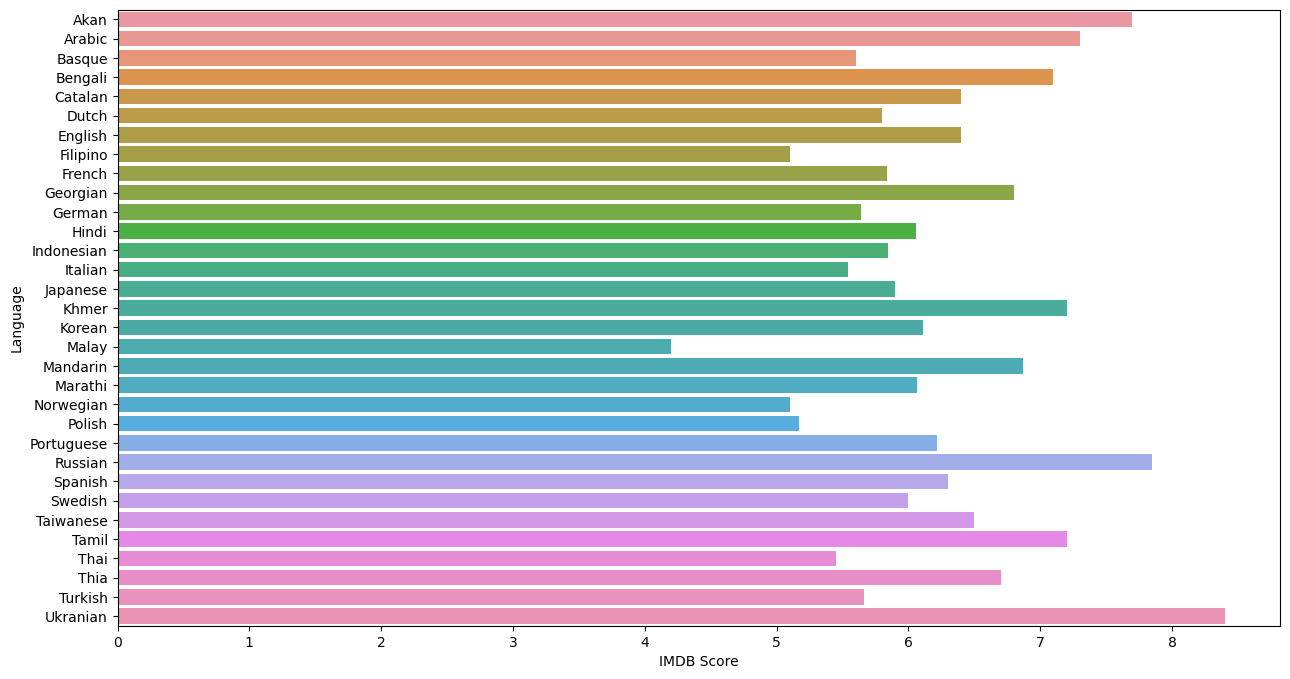

In [139]:
sns.barplot(data=avg_imdb_by_lang, y='Language',x='IMDB Score')

### 3. How do movies released in different years compare in terms of runtime and IMDB scores?

In [140]:
df_netflix.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language',
       'Year'],
      dtype='object')

In [145]:
year_runtime_imdb = df_netflix.groupby(by='Year')[['Runtime','IMDB Score']].mean().reset_index()

In [146]:
type(year_runtime_imdb)

pandas.core.frame.DataFrame

In [147]:
year_runtime_imdb.columns

Index(['Year', 'Runtime', 'IMDB Score'], dtype='object')

<Axes: xlabel='Runtime', ylabel='IMDB Score'>

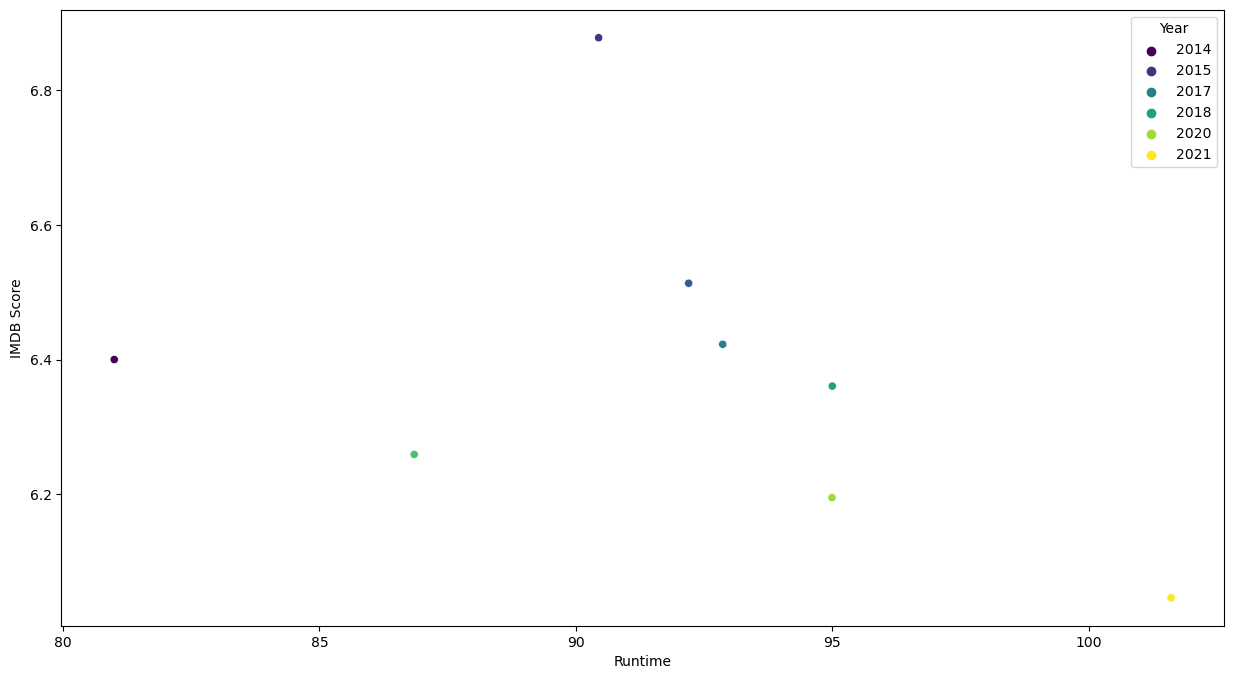

In [149]:
sns.scatterplot(data=year_runtime_imdb, x='Runtime',y='IMDB Score', 
               hue='Year', palette='viridis')

<Axes: xlabel='Year', ylabel='Runtime'>

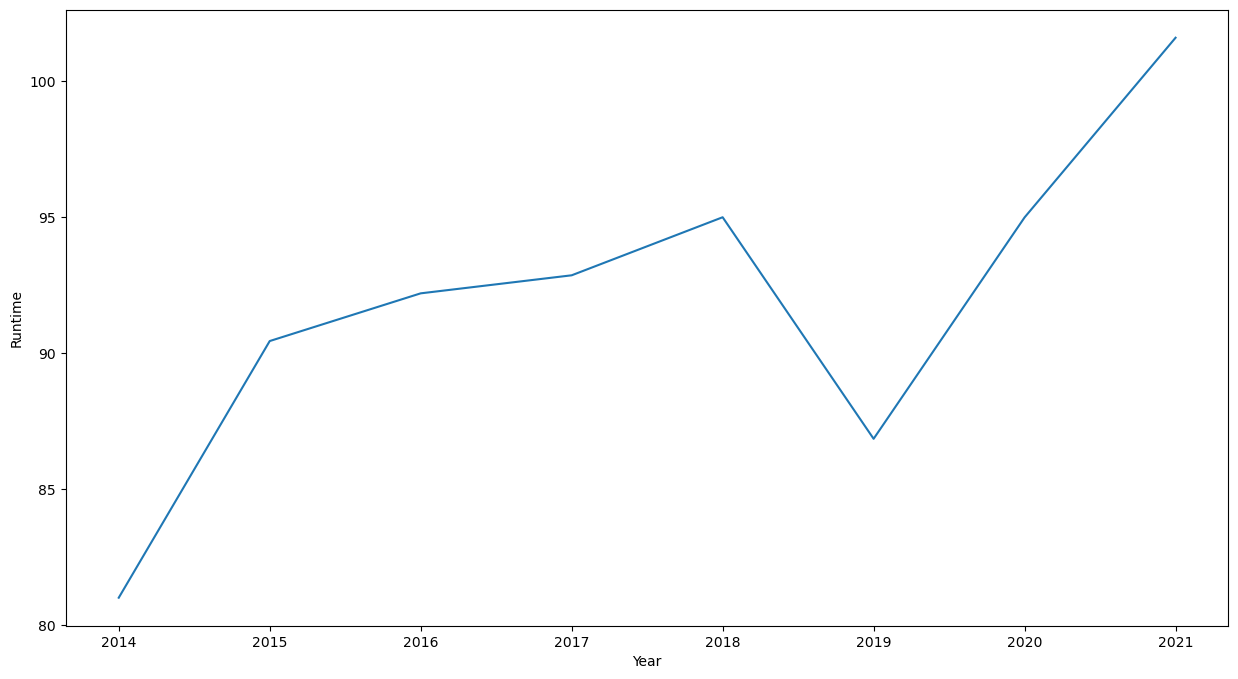

In [150]:
sns.lineplot(data=year_runtime_imdb, x='Year',y='Runtime')

Here, we can see an upward trend. Runtime, more or less, has increased in the recent years with the exception of year 2019.

<Axes: xlabel='Year', ylabel='IMDB Score'>

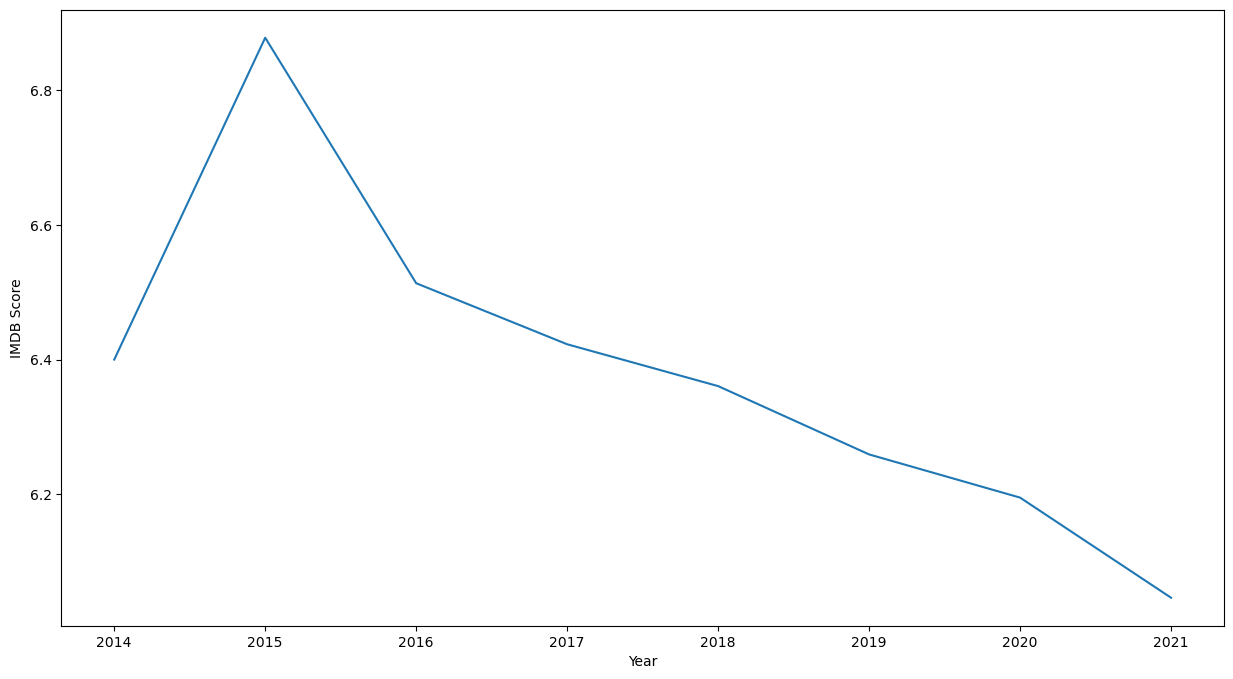

In [151]:
sns.lineplot(data=year_runtime_imdb, x='Year',y='IMDB Score')

Here, on the contrary, we can see a declining trend where IMDB Score has decreased with the years with the exception on=f year 2015 where it was at its peak.

## Outliers and Distribution:

### 1. Are there any outliers in the runtime or IMDB score columns?

In [158]:
# Calculating the IQR, lower and upper whisker

In [159]:
Q1 = df_netflix['Runtime'].quantile(0.25)
Q3 = df_netflix['Runtime'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

In [169]:
print("The lower whisker is: ",lower_whisker)
print("The upper whisker is: ",upper_whisker)
print("IQR: ",IQR)
print("Q1: ",Q1)
print("Q3: ",Q3)
print("Q2, the 50%: ", df_netflix['Runtime'].median())

The lower whisker is:  53.0
The upper whisker is:  141.0
IQR:  22.0
Q1:  86.0
Q3:  108.0
Q2, the 50%:  97.0


<Axes: xlabel='Runtime'>

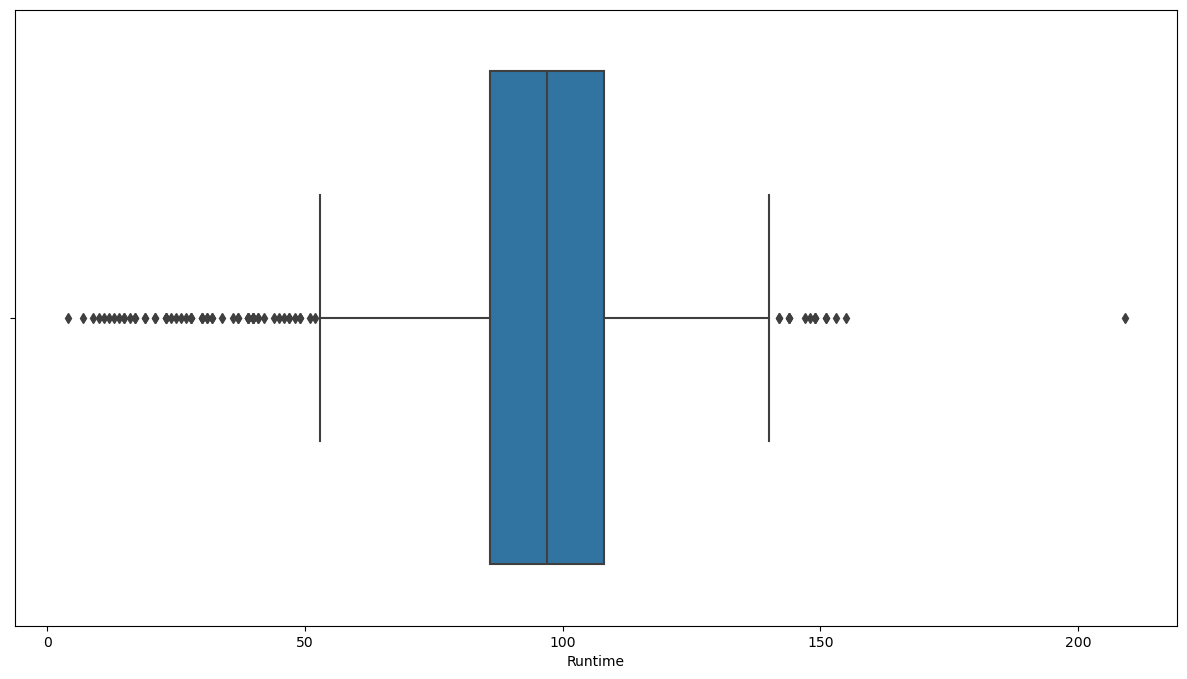

In [164]:
sns.boxplot(x=df_netflix['Runtime'], orient='v')


As seen above, there are many outliers that are lesser than 53 minutes and a few that are well above the upper whisker which is 141 minutes.

Most of the movies' runtimes fall in between 86 minutes and 108 minutes with 50% of the movies having a runtime of under 97 minutes.

### 2. What is the distribution of runtimes across different genres?

In [172]:
df_netflix['Genre'].value_counts()

Genre
Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama              

In [173]:
df_netflix['Genre'].nunique()

115

There are 115 total genres in this dataset which we cannot visualize all at once. So let us consider the top ten genres.

In [175]:
top_n_genres = 10
top_genres = genre_counts.nlargest(top_n_genres).index
top_genres

Index(['Documentary', 'Drama', 'Comedy', 'Romantic comedy', 'Thriller',
       'Comedy-drama', 'Crime drama', 'Biopic', 'Horror', 'Action'],
      dtype='object', name='Genre')

In [179]:
df_top_genres = df_netflix[df_netflix['Genre'].isin(top_genres)]
df_top_genres['Genre'].value_counts()

Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Comedy-drama        14
Crime drama         11
Horror               9
Biopic               9
Action               7
Name: count, dtype: int64

<Axes: xlabel='Runtime', ylabel='Genre'>

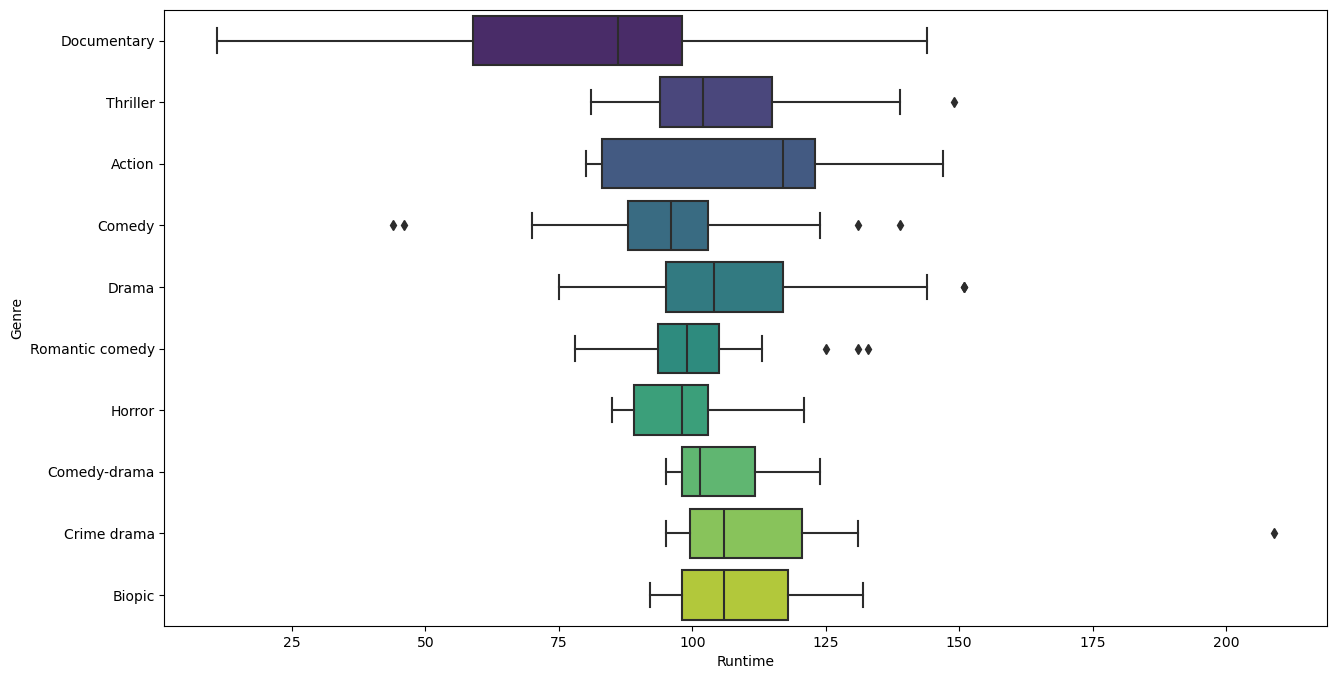

In [180]:
sns.boxplot(data=df_top_genres, x='Runtime', y='Genre', palette='viridis')

Here, we can see that the genres 'Thriller','Comedy','Drama', 'Romantic Comedy' and 'Crime Data' have outliers with regards to their Runtime.
